<img align="right" src="images/tf-small.png" width="90"/>
<img align="right" src="images/etcbc.png" width="100"/>

# Introduction to 'Who is Who in the Psalms'? 

This notebook explores the data types within the ETCBC database that are (potentially) important for a sound participant analysis in the Hebrew Bible. The data exploration consists firstly of counts of categories or features that contain person, gender and number (PGN) information in the Psalms and other Hebrew Bible books. Secondly, all sorts of PGN are also counted for both the Psalms and other Hebrew Bible books. Thirdly, [phrase dependent part of speech](https://etcbc.github.io/bhsa/features/pdp/) within phrase types is counted. The counts of these types of information give an impression of the amount of data a reader and/or scholar needs to process for participant analysis. 

The tables and charts, generated with Pandas and Matplotlib, that are relevant for Psalms in comparison with the other bible books are printed. Tables and charts that give a view on all PGN categories and sorts are left unprinted, but are indicated by comments with `#`. 

In [2]:
__author__ = 'erwich'

In [1]:
from utils import *

To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
   |     0.00s Dataset without structure sections in otext:no structure functions in the T-API


## 1. Person, Number, Gender Categories in the Psalms

In [2]:
pgn_count_dict, all_pgn_count = CountPgnCategories()

In [3]:
#Nahum does not have prde, so fill in 0 for NaN
df = pd.DataFrame.from_dict(pgn_count_dict, orient='index').fillna(0).astype(int) 

# sum all columns per book
df.index.name = 'bible_book'
pgn_cat_count = df.reset_index()
pgn_cat_count['total_book'] = pgn_cat_count.iloc[:, 1:].sum(axis=1, numeric_only=True)

pgn_cat_tot = pgn_cat_count.pivot_table(index='bible_book',
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum).reset_index()

### 1.1 Table: Person, Gender, Number  Categories in the Psalms

In [4]:
ps_cat = pgn_cat_tot.loc[pgn_cat_tot['bible_book'] == 'Psalms']
ps_cat

,bible_book,pgn_prde,pgn_prps,pgn_prs,pgn_verb,total_book
34,Psalms,49,294,4651,5294,10288


In [5]:
# select all rows, except Psalms, and drop the total row on index 39 
ex = pgn_cat_tot.loc[pgn_cat_tot['bible_book'] != 'Psalms'].drop([39]) # drop total

# add total again of all biblebooks except the Psalms
ex_ps_tot = ex.pivot_table(index='bible_book',
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum).reset_index()

# only select the total of all books except the Psalms
ex_ps_cat = ex_ps_tot.iloc[[38]]

### 1.2 Table: Person, Number, Gender Categories in the Psalms and the Rest of the HB

In [6]:
#append totals except Psalms to total pgn of the Psalms 
ps_rest_cat = ps_cat.append(ex_ps_cat, ignore_index = True)
ps_rest_cat['bible_book'] = ps_rest_cat['bible_book'].replace(['total'], 'Rest_HB')

ps_rest_cat = ps_rest_cat.pivot_table(index='bible_book',
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum).reset_index()
# rename column names
ps_cat = ps_rest_cat.rename(columns = {'bible_book':'section/total', 'total_book': 'total_cat'})

ps_cat

,section/total,pgn_prde,pgn_prps,pgn_prs,pgn_verb,total_cat
0,Psalms,49,294,4651,5294,10288
1,Rest_HB,2483,4158,40507,63732,110880
2,total,2532,4452,45158,69026,121168


In [91]:
# The booktabs package is required as to_latex() uses its commands for table rules. 
import os 

print(ps_cat.to_latex(index=False))
OUTPUT = os.path.expanduser('~/Documents/PhD/1-dissertation/DISSERTATIONlatex/Tables/')

with open(f'{OUTPUT}psalms_pgn_cat.tex','w') as tf:
    tf.write(ps_cat.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
section/total &  pgn\_prde &  pgn\_prps &  pgn\_prs &  pgn\_verb &  total\_cat \\
\midrule
       Psalms &        49 &       294 &     4651 &      5294 &      10288 \\
      Rest\_HB &      2483 &      4158 &    40507 &     63732 &     110880 \\
        total &      2532 &      4452 &    45158 &     69026 &     121168 \\
\bottomrule
\end{tabular}



### 1.3 Table: sorts of PGN within all PGN categories in the Psalms

In [7]:
all_pgn_df = pd.DataFrame.from_dict(all_pgn_count, orient='index').sort_values(
    by=['Psalms'], axis=1, ascending=False)

# sum all columns per book
all_pgn_df.index.name = 'bible_book'
all_pgn = all_pgn_df.reset_index()
all_pgn['total_book'] = all_pgn.iloc[:, 1:].sum(axis=1, numeric_only=True)

# sum all columns and rows and add sum as row 'total' to the end of the dataframe
all_pgn_tot = all_pgn.pivot_table(index='bible_book',
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum).reset_index()

all_pgn_ps = all_pgn_tot.loc[all_pgn_tot['bible_book'] == 'Psalms']

In [8]:
all_pgn_ps.sort_values(by='total_book', ascending=False)

,bible_book,Cpl-1,Cpl-2,Csg,Fsg,Fsg-1,Fsg-2,Fsg-3,Msg,Msg-1,...,P3Fpl,P3Fsg,P3Mpl,P3Msg,UFpl,UFsg,UMpl,UMsg,UUU,total_book
34,Psalms,0,8,0,0,21,0,1,0,19,...,21,345,1184,2137,6,23,107,305,286,10288


### 1.4 Table: Sorts of PGN within all PGN categories in the Psalms and the Rest of the HB

In [9]:
# select all rows, except Psalms, and drop the total row on index 39 
ex_pgn_ps = all_pgn_tot.loc[all_pgn_tot['bible_book'] != 'Psalms'].drop([39])


# add total again of all biblebooks except the Psalms
pgn_ex_ps = ex_pgn_ps.pivot_table(index='bible_book',
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum).reset_index()

# only select the total, except the Psalms
pgn_ex_ps = pgn_ex_ps.iloc[[38]]

In [10]:
#append totals except Psalms to total pgn of the Psalms 
pgn_ps_rest = all_pgn_ps.append(pgn_ex_ps, ignore_index = True)
pgn_ps_rest['bible_book'] = pgn_ps_rest['bible_book'].replace(['total'], 'Rest_HB')

pgn_ps_rest = pgn_ps_rest.pivot_table(index='bible_book',
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum).reset_index()

#pgn_ps_rest.columns=pgn_ps_rest.columns.str.strip()

pgn_ps_rest.sort_values(by=['total_book'], ascending=True)

pgn_ps_rest = pgn_ps_rest[[
                            'bible_book', 'P1Cpl', 'P1Csg', 'P2Fpl', 'P2Fsg', 'P2Mpl', 'P2Msg', 'P3Cpl', 
                            'P3Fpl', 'P3Fsg','P3Mpl', 'P3Msg', 'UFpl', 'UFsg', 'UMpl', 'UMsg', 'UUU', 'Cpl-1', 
                            'Cpl-2', 'Csg', 'Fsg', 'Fsg-1', 'Fsg-2','Fsg-3', 'Msg', 'Msg-1', 'total_book'
                          ]]

#df = df[['mean', '0', '1', '2', '3']]
#cols = list(pgn_ps_rest.columns.values)
#cols
pgn_ps_rest = pgn_ps_rest.rename(columns = {'bible_book':'section/total', 'total_book': 'total_pgn'})

pgn_ps_rest

,section/total,P1Cpl,P1Csg,P2Fpl,P2Fsg,P2Mpl,P2Msg,P3Cpl,P3Fpl,P3Fsg,...,Cpl-1,Cpl-2,Csg,Fsg,Fsg-1,Fsg-2,Fsg-3,Msg,Msg-1,total_pgn
0,Psalms,343,2450,0,67,294,2279,392,21,345,...,0,8,0,0,21,0,1,0,19,10288
1,Rest_HB,2448,12604,73,2076,6306,12298,3817,593,7340,...,9,738,7,1,583,11,1,2,1131,110880
2,total,2791,15054,73,2143,6600,14577,4209,614,7685,...,9,746,7,1,604,11,2,2,1150,121168


In [112]:
with open(f'{OUTPUT}pgn_ps_rest.tex','w') as tf:
    tf.write(pgn_ps_rest.to_latex(index=False))

## 2. Phrase Dependent Part of Speech within Phrase Types in the Psalms

### Table: Phrase Dependent Part of Speech within Phrase Types

In [11]:
phr_typ_pdp_count = CountTypPdp('Psalms', 1, 150)

phr_typ_pdp_count_df = pd.DataFrame.from_dict(phr_typ_pdp_count, orient='index').sort_values(
    by=['subs'], axis=0, ascending=False)

phr_typ_pdp = phr_typ_pdp_count_df.fillna('-')

phr_typ_pdp

,prep,subs,nmpr,art,advb,conj,prin,inrg,adjv,prde,nega,verb,prps
NP,145,5380,211,221,33,235,-,-,98,2,3,-,3
PP,3910,3609,430,493,35,122,12,13,68,10,2,-,-
PrNP,3,76,602,4,2,12,-,-,2,-,-,-,-
PPrP,1,16,2,-,5,4,-,-,-,-,-,-,291
AdjP,1,13,2,-,-,21,-,-,172,-,-,-,-
VP,268,9,-,-,-,2,-,-,-,-,-,5296,-
AdvP,2,5,-,-,298,5,-,-,-,-,-,-,-
DPrP,-,3,-,1,-,-,-,-,-,36,-,-,-
IPrP,-,-,-,-,-,-,55,-,-,2,-,-,-


In [118]:
with open(f'{OUTPUT}phr_typ_pdp.tex','w') as tf:
    tf.write(phr_typ_pdp.to_latex())

# 3. All PGN Sorts in all HB Books

In [12]:
pgn_prps_dict, pgn_prde_dict, pgn_verb_dict, pgn_prs_dict = get_all_pgn()

### 3.1 Make Pandas dataframes

In [13]:
# prps: independent personal pronouns
pgn_prps_df = pd.DataFrame.from_dict(pgn_prps_dict, orient='index') 

# prde: demonstratives
pgn_prde_df = pd.DataFrame.from_dict(pgn_prde_dict, orient='index')

# verb: verbs
pgn_verb_df = pd.DataFrame.from_dict(pgn_verb_dict, orient='index')

# prs: suffixes
pgn_prs_df = pd.DataFrame.from_dict(pgn_prs_dict, orient='index')#.sort_values(by=['P3Msg'], ascending=False)

# inspect the dataframe
#pgn_prps_df
#pgn_prde_df
#pgn_verb_df
#pgn_prs_df

### 3.2 Count verses and words per HB book

In [14]:
object_count_dict = CountVersesWords()

### 3.3 Get all genres within the HB

In [15]:
genre_dict = GetGenres()

### 3.4 Merge genre and verse and word count per book

In [16]:
genre_left = pd.DataFrame.from_dict(genre_dict, orient='index')
objects_right = pd.DataFrame.from_dict(object_count_dict, orient='index')

object_genre_count = pd.merge(genre_left, objects_right, left_index = True, right_index = True, sort=False)
object_genre_count.columns = ['genre','verse_cnt', 'word_cnt']

#inspect dataframe
#object_genre_count

### 3.5 Make PGN dataframes per category

### Personal Pronouns (prps)

In [17]:
# merge the verse count and prps dataframes
pgn_prps_count = pd.merge(object_genre_count, pgn_prps_df, left_index = True, right_index = True, sort=False)

# add all prps 

pgn_prps_count['total_prps'] = pgn_prps_count.iloc[:, 3:].sum(axis=1)

# calculate ratio of prps to verses
pgn_prps_count['r_prps_v'] = round(pgn_prps_count['total_prps'] / pgn_prps_count['verse_cnt'], 3)

# calculate ratio of prps to words
pgn_prps_count['r_prps_w'] = round(pgn_prps_count['total_prps'] / pgn_prps_count['word_cnt'], 3)

# inspect the dataframe
#pgn_prps_count

### Demonstrative Pronouns (prde)

In [18]:
# merge the verse count and prde dataframes
pgn_prde_count = pd.merge(object_genre_count, pgn_prde_df, left_index = True, right_index = True, sort=False)

# add all prde
pgn_prde_count['total_prde'] = pgn_prde_count.iloc[:, 3:].sum(axis=1)

# calculate ratio of prde to verses
pgn_prde_count['r_prde_v'] = round(pgn_prde_count['total_prde'] / pgn_prde_count['verse_cnt'], 3)

# calculate ratio of prps to words
pgn_prde_count['r_prde_w'] = round(pgn_prde_count['total_prde'] / pgn_prde_count['word_cnt'], 3)

# inspect the dataframe      
#pgn_prde_count

### PGN of Verbs

In [19]:
# merge the verse count and pgn verb dataframes
pgn_verb_count = pd.merge(object_genre_count, pgn_verb_df, left_index = True, right_index = True, sort=False)

# add all pgn verbs
pgn_verb_count['total_verb'] = pgn_verb_count.iloc[:, 3:].sum(axis=1)

# calculate ratio of pgn verbs to verses
pgn_verb_count['r_verb_v'] = round(pgn_verb_count['total_verb'] / pgn_verb_count['verse_cnt'], 3)

# calculate ratio of pgn verbs to words
pgn_verb_count['r_verb_w'] = round(pgn_verb_count['total_verb'] / pgn_verb_count['word_cnt'], 3)
                
# inspect the dataframe
#pgn_verb_count

### Suffixes (prs)

In [20]:
# merge the verse count and prs dataframes
pgn_prs_count = pd.merge(object_genre_count, pgn_prs_df, left_index = True, right_index = True, sort=False)

# add all prs
pgn_prs_count['total_prs'] = pgn_prs_count.iloc[:, 3:].sum(axis=1)

# calculate ratio of prs to verses
pgn_prs_count['r_prs_v'] = round(pgn_prs_count['total_prs'] / pgn_prs_count['verse_cnt'], 3)

# calculate ratio of prs to words
pgn_prs_count['r_prs_w'] = round(pgn_prs_count['total_prs'] / pgn_prs_count['word_cnt'], 3)

# inspect the dataframe
#pgn_prs_count

### 3.6 Stacked plot of the totals per HB book

In [21]:
#{pgn_prps_count.columns.get_loc(c):c for idx, c in enumerate(pgn_prps_count.columns)}

total_prps = pd.DataFrame(pgn_prps_count[['genre', 'verse_cnt', 'word_cnt', 'total_prps']]).reset_index()
total_prps.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'total_prps']

total_prde = pd.DataFrame(pgn_prde_count[['genre', 'verse_cnt', 'word_cnt', 'total_prde']]).reset_index()
total_prde.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'total_prde']

total_verb = pd.DataFrame(pgn_verb_count[['genre', 'verse_cnt', 'word_cnt', 'total_verb']]).reset_index()
total_verb.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'total_verb']

total_prs = pd.DataFrame(pgn_prs_count[['genre', 'verse_cnt', 'word_cnt', 'total_prs']]).reset_index()
total_prs.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'total_prs']

dfs = [total_verb, total_prs, total_prps, total_prde]
totals = reduce(lambda left, right: pd.merge(left, 
                                             right, 
                                             on=['bible_book', 'genre', 'verse_cnt', 'word_cnt']), 
                                            dfs)

totals['total_pgn'] = totals.iloc[:, 4:].sum(axis=1)

# sort on total verb first 
#['total_verb', 'total_prs', 'total_prps', 'total_prde']
sort_tot = totals.sort_values(by=['total_pgn'], ascending=False)
sort_tot

,bible_book,genre,verse_cnt,word_cnt,total_verb,total_prs,total_prps,total_prde,total_pgn
37,Psalms,poetry,2527,25371,5294,4651,294,49,10288
0,Genesis,prose,1533,28763,4890,3348,367,228,8833
20,Jeremiah,prophecy,1364,29736,4996,3098,323,291,8708
21,Ezekiel,prophecy,1273,26182,4079,3276,409,100,7864
19,Isaiah,prophecy,1291,22931,4472,2601,245,129,7447
4,Deuteronomy,prose,959,20127,3322,2903,258,176,6659
1,Exodus,prose,1213,23748,3523,2231,205,133,6092
7,1_Samuel,prose,811,18929,3395,1804,192,136,5527
3,Numbers,prose,1289,23188,2959,1890,177,169,5195
9,1_Kings,prose,817,18685,2949,1635,181,116,4881


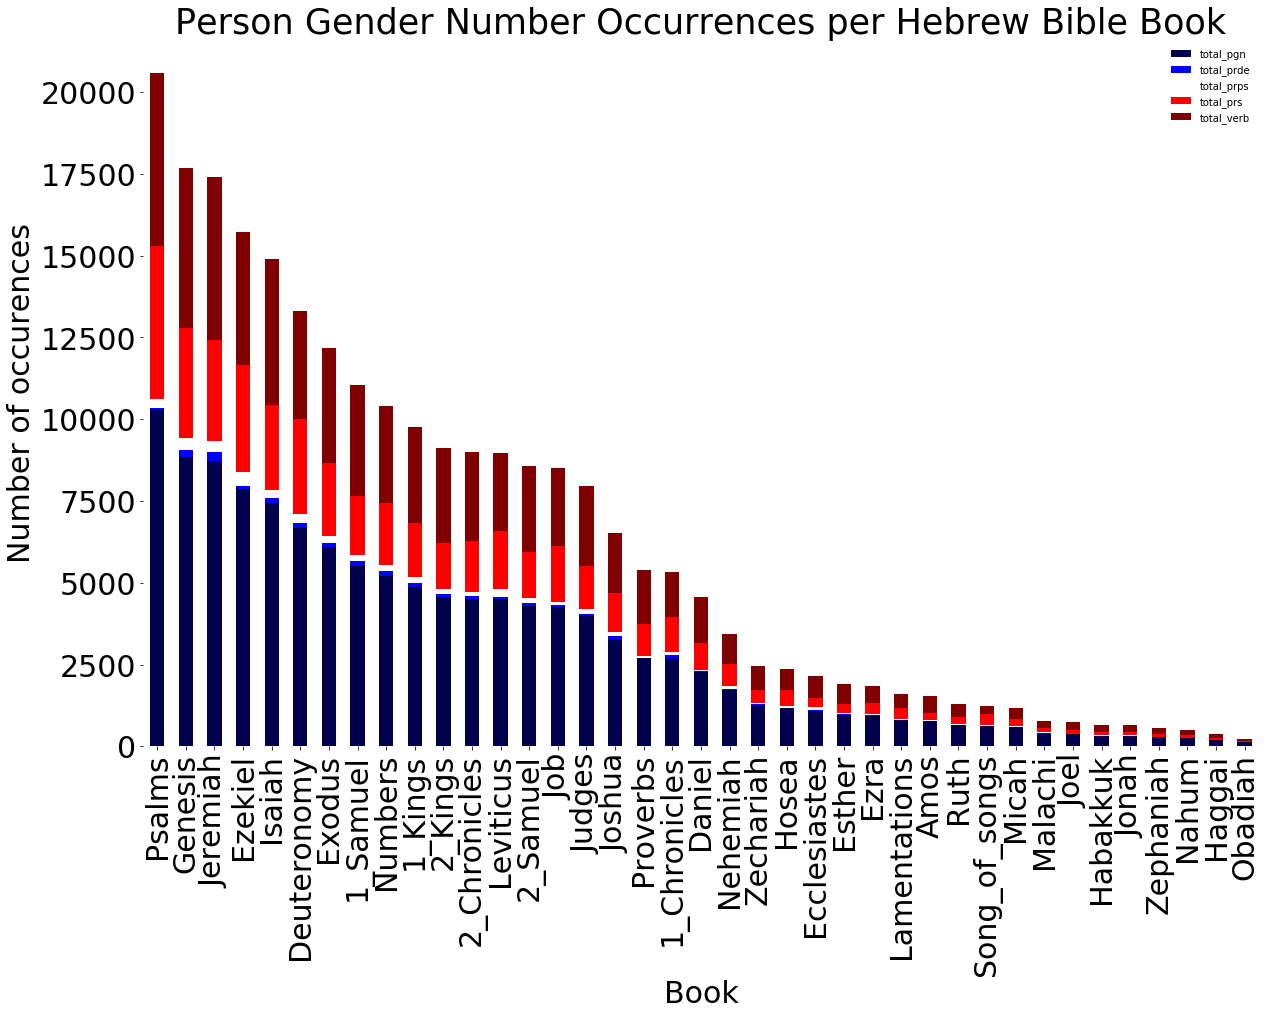

In [22]:
exclude = ['verse_cnt', 'word_cnt'] # exclude these columns

sort_tot.loc[:, sort_tot.columns.difference(exclude)].plot(kind='bar', 
                                                           x='bible_book', 
                                                           stacked=True, 
                                                           fontsize=30, 
                                                           figsize=(20, 13), 
                                                           sort_columns=True,
                                                           colormap='seismic')

plt.title(('Person Gender Number Occurrences per Hebrew Bible Book'), fontsize=35)
plt.xlabel('Book', fontsize=30)
plt.ylabel('Number of occurences', fontsize=30)
plt.box(False)
plt.legend(frameon=False)
plt.show()

In [23]:
#{pgn_prps_count.columns.get_loc(c):c for idx, c in enumerate(pgn_prps_count.columns)}

ratio_prps = pd.DataFrame(pgn_prps_count[['genre', 'verse_cnt', 'word_cnt', 'r_prps_v', 'r_prps_w']]).reset_index()
ratio_prps.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'r_prps_v', 'r_prps_w']

ratio_prde = pd.DataFrame(pgn_prde_count[['genre', 'verse_cnt', 'word_cnt', 'r_prde_v', 'r_prde_w']]).reset_index()
ratio_prde.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'r_prde_v', 'r_prde_w']

ratio_verb = pd.DataFrame(pgn_verb_count[['genre', 'verse_cnt', 'word_cnt', 'r_verb_v', 'r_verb_w']]).reset_index()
ratio_verb.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'r_verb_v', 'r_verb_w']

ratio_prs = pd.DataFrame(pgn_prs_count[['genre', 'verse_cnt', 'word_cnt', 'r_prs_v', 'r_prs_w']]).reset_index()
ratio_prs.columns = ['bible_book', 'genre', 'verse_cnt', 'word_cnt', 'r_prs_v', 'r_prs_w']

dfs = [ratio_verb, ratio_prs, ratio_prps, ratio_prde]
totals = reduce(lambda left, right: pd.merge(left, 
                                             right, 
                                             on=['bible_book', 'genre', 'verse_cnt', 'word_cnt']), 
                                            dfs)

totals['r_pgn_tot'] = round(totals['r_prs_w'] 
                                + totals['r_verb_w'] 
                                + totals['r_prps_w'] 
                                + totals['r_prde_w'], 3)

# sort on total pgn/word ratio
ratio_tot = totals.sort_values(by=['r_pgn_tot'], ascending=False)

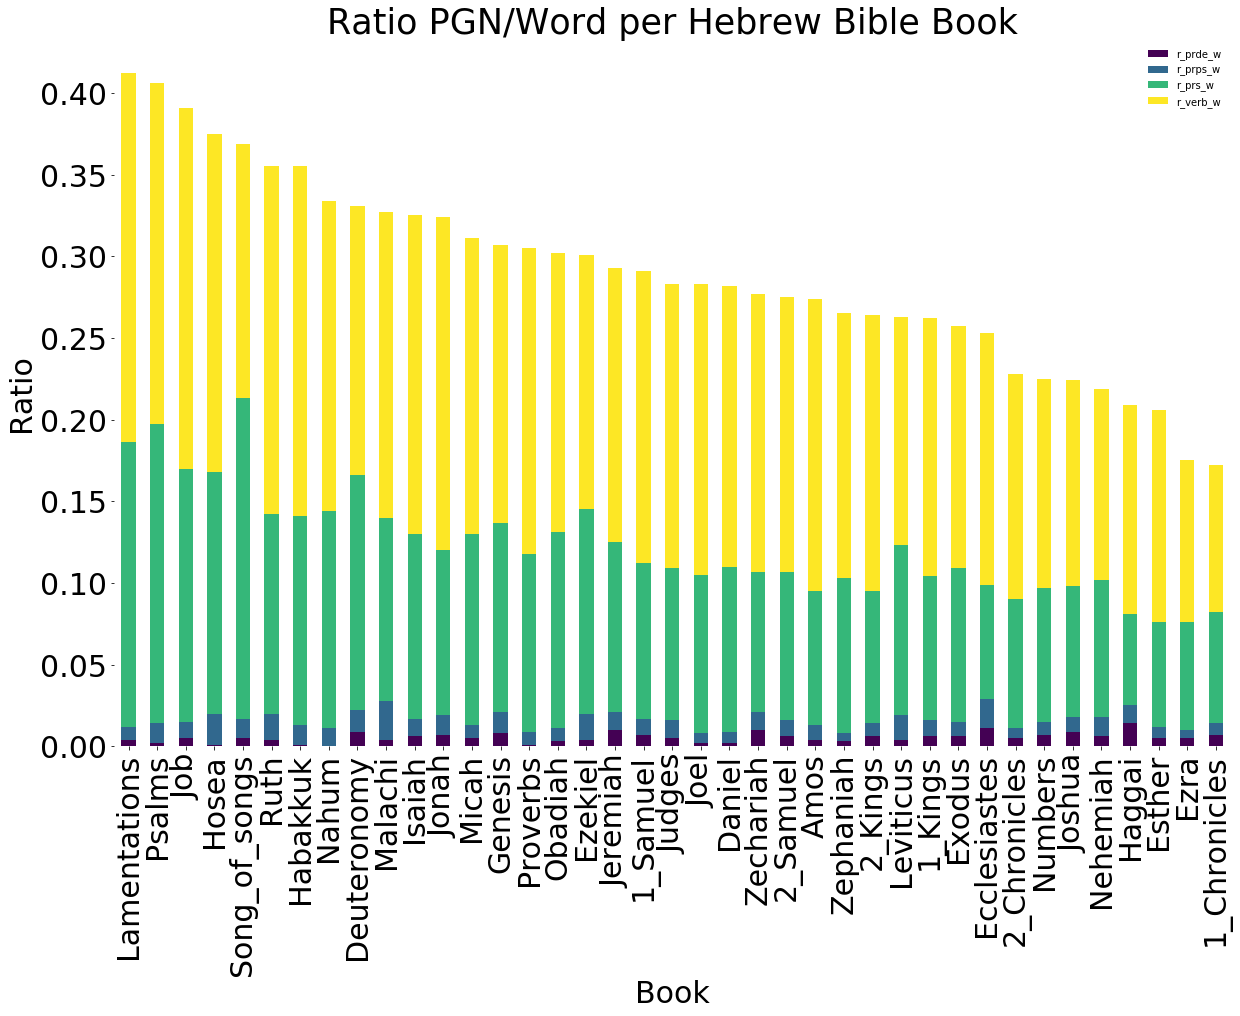

In [24]:
# exclude these columns

exclude = ['verse_cnt', 'word_cnt', 'r_prps_v', 
           'r_prde_v', 'r_verb_v', 'r_prs_v',
           'r_pgn_tot'
          ] 

exclude = ['verse_cnt', 'word_cnt', 'r_prps_v', 
           'r_prde_v', 'r_verb_v', 'r_prs_v',
           'r_pgn_tot'
          ] 

ratio_tot.loc[:, ratio_tot.columns.difference(exclude)].plot(kind='bar', 
                                                             x='bible_book', 
                                                             stacked=True, 
                                                             fontsize=30, 
                                                             figsize=(20, 13), 
                                                             sort_columns=True, colormap='viridis') 
                                                            #colormap='Blues' legend='reverse'
                                                            #colormap='viridis'

plt.title(('Ratio PGN/Word per Hebrew Bible Book'), fontsize=35)
plt.xlabel('Book', fontsize=30)
plt.ylabel('Ratio', fontsize=30)
plt.box(False)
plt.legend(frameon=False)
plt.show()

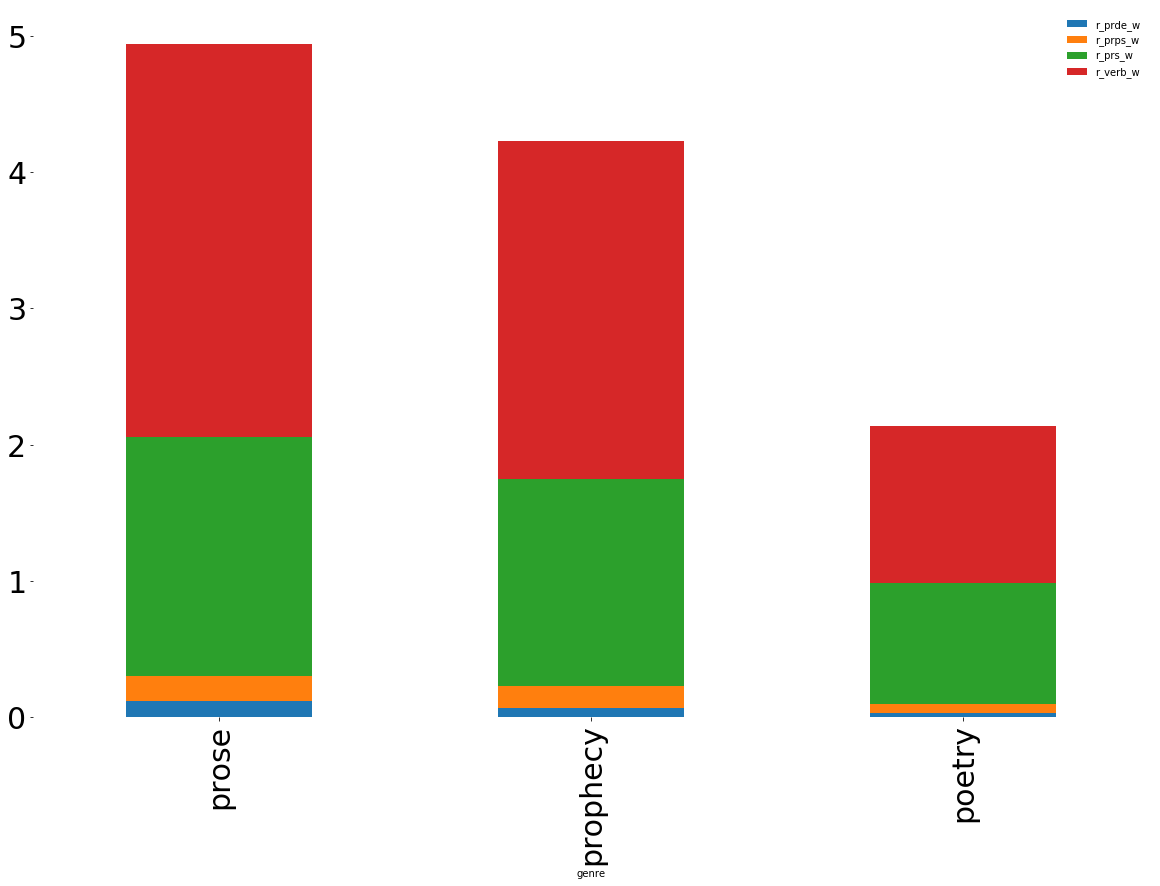

In [25]:
ratio_tot.loc[:, ratio_tot.columns.difference(exclude)].groupby(['genre']).sum().sort_values(by=['r_verb_w'], 
                                                                                    ascending=False).plot(
                                                                                    kind='bar', 
                                                                                    stacked=True, 
                                                                                    fontsize=30, 
                                                                                    figsize=(20, 13), 
                                                                                    sort_columns=True)
plt.box(False)
plt.legend(frameon=False)
plt.show()

In [26]:
tp = sort_tot['total_pgn'].sum()

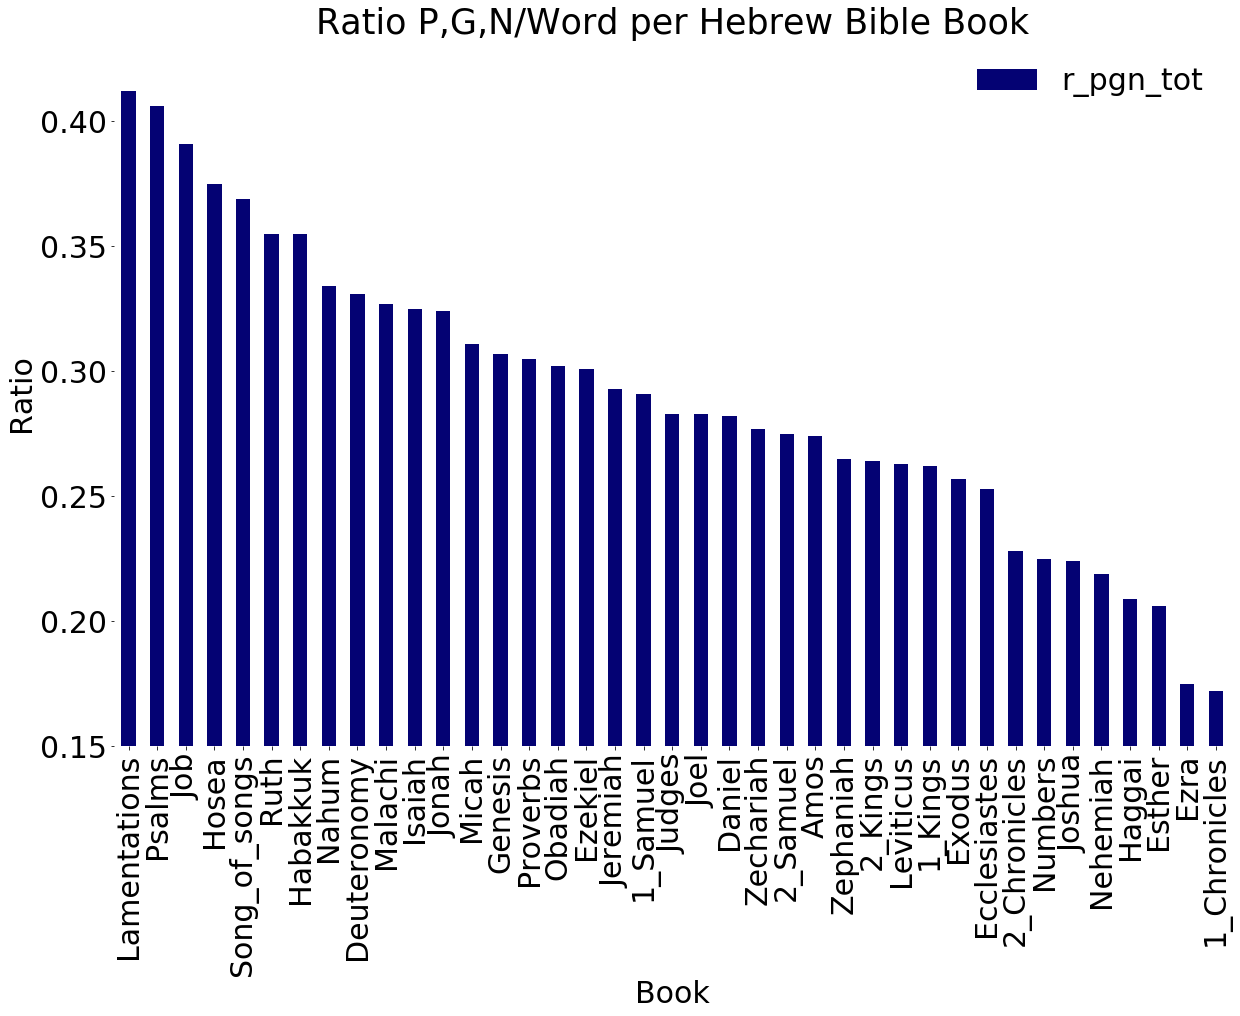

In [29]:
ratio_tot.plot(x='bible_book',
                            y='r_pgn_tot',
                            kind='bar',
                             fontsize=30, 
                             figsize=(20, 13), #figsize=(30,12)
                             sort_columns=True, color='xkcd:deep blue') 

plt.title(('Ratio P,G,N/Word per Hebrew Bible Book'), fontsize=35)
plt.xlabel('Book', fontsize=30)
plt.ylabel('Ratio', fontsize=30)
plt.box(False)
plt.legend(frameon=False, fontsize=30)
plt.ylim(ymin=0.15)
plt.show()